# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented, 
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

<span style="font-family:Verdana; color: green;">ANSWER: <br> In the following snippet we performed the principal component analysis (PCA) for the provided training data. </span>

<div style="font-family:Verdana; color: green;">
    <ol>
        <li> we have used the built-in PCA component inside the sklearn.decomposition module to do the PCA. However, to understand the principal component analysis (PCA). First, we use the numpy cov() function to compute the covariance matrix for the training data. We then compute eigen values and vectors using numpy's eigh(). We then sort the eigen vectors by their respective eignen values. We then arrange the eigen pairs where the first value of the pair is the normalized eigen value and the second value of the pair is the eigen vector.</li>
        <li> We have printed the fraction of total variance for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].</li>
        <li> We have ploted the fraction of total variances vs. number of principal components.</li>
        <li> Finally, as instructed we have used PCA.fit() only once.</li>
    </ol>
</div>



Fraction of total variance:  [0.30212093 0.40551281 0.47729703 0.5165934  0.55400106 0.68365517
 0.83303145 0.91970405 0.97068263 1.        ]


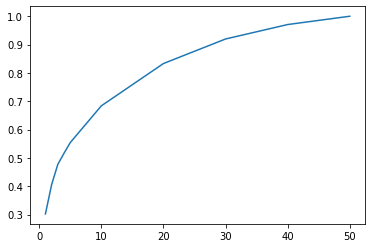

In [5]:
def P1():
    ## STUDENT START ###
    #cov_mat = np.cov(train_data.T)
    #eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
    #tot = sum(eig_vals)
    #eig_pairs = [(vl/tot, vc) for vl, vc in sorted(zip(eig_vals, eig_vecs), key=lambda x: x[0], reverse=True)]
    #cum_eig_vals = np.cumsum(np.array([*eig_pairs])[:,0])
    
    x = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    #y = cum_eig_vals[x]
    #plt.plot(x, y)
        
    pca = PCA(n_components=51)
    pca.fit(train_data)
    cum_var = np.cumsum(pca.explained_variance_/sum(pca.explained_variance_))
    print("Fraction of total variance: ", cum_var[x])
    #print("", cum_eig_vals[x])
    
    plt.plot(x, cum_var[x])
    ## STUDENT END ###

P1()

<span style="font-family:Verdana; color: green;"> To understand the principal component analysis (PCA) we built the PCA from the scratch as follows. First, we use the numpy cov() function to compute the covariance matrix for the training data. We then compute eigen values and vectors using numpy's eigh(). We then sort the eigen vectors by their respective eignen values. We then arrange the eigen pairs where the first value of the pair is the normalized eigen value and the second value of the pair is the eigen vector. We have ploted the fraction of total variances against number of principal components as above to compare it with the plot above.<span>

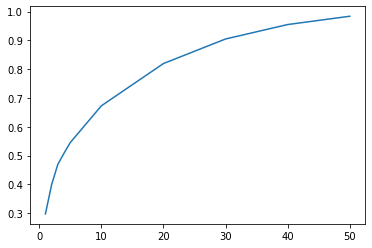

In [6]:
def P1_from_scratch():
    ## STUDENT START ###
    # get the covariance matrix
    cov_mat = np.cov(train_data.T)
    
    # calcualte the eigen values and vectors
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
    
    # compute the sum of all the eigen values
    tot = sum(eig_vals)
    
    # compute eigen pairs normalized eignen value and its eigen vector and sort it by the value
    eig_pairs = [(vl/tot, vc) for vl, vc in sorted(zip(eig_vals, eig_vecs), key=lambda x: x[0], reverse=True)]
    cum_eig_vals = np.cumsum(np.array([*eig_pairs], dtype=object)[:,0])
    
    # plotted the cumulative eigen values and the count it makes it
    x = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    y = cum_eig_vals[x]
    plt.plot(x, y)
    
P1_from_scratch()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

<span style="font-family:Verdana; color: green;">ANSWER: <br> In the following snippet we performed the principal component analysis (PCA) for the provided training data. As we are interested in ploting the data in 2 dimensions, we chose the components to be 2 and transformed the trainng data: </span>

<div style="font-family:Verdana; color: green;">
    <ol>
        <li> We have color coded the examples with poisonous (label 1) in red and non-poisonous (label 0) in green.</li>
        <li> we have plotted this using a scatter plot.</li>
    </ol>
</div>

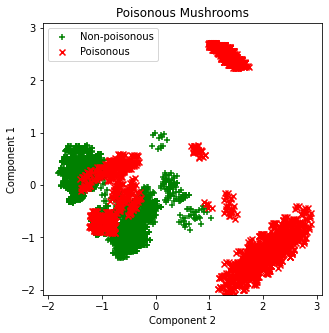

In [7]:
def Q2():
    ### STUDENT START ###
    # we are reducing the dmentions to 2 using PCA
    pca = PCA(n_components=2)
    X = pca.fit_transform(train_data)
    
    # plotting the poisonous and nonpoisonous in two dimensions with color red and green resp.
    plt.figure(figsize=(5,5))
    plt.scatter(X[train_labels == 0][:, 0], X[train_labels == 0][:, 1], marker='+', c='green')
    plt.scatter(X[train_labels == 1][:, 0], X[train_labels == 1][:, 1], marker='x', c='red')
    
    # limiting the axes for clarity
    plt.ylim([-2.1, 3.1])
    plt.xlim([-2.1, 3.1])
    
    plt.legend(['Non-poisonous','Poisonous'])
    plt.title('Poisonous Mushrooms')
    plt.ylabel('Component 1')
    plt.xlabel('Component 2')
    ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

<span style="font-family:Verdana; color: green;">ANSWER: <br> In the following snippet we performed the k-means clustering of the projected 2d data for the provided training data. As in the previous problem we have created a color code scattered plot of both poisonous and non-poisonous mushrooms. </span>

<div style="font-family:Verdana; color: green;">
    <ol>
        <li> We have color coded the poisonous mushrooms in red and non-poisonous mushrooms in green.</li>
        <li> Using the k-means clustering we clustered the data points into 6 clusters and have plotted the centroids and their corresponding circle with the most distance from the centroid.</li>
    </ol>
</div>

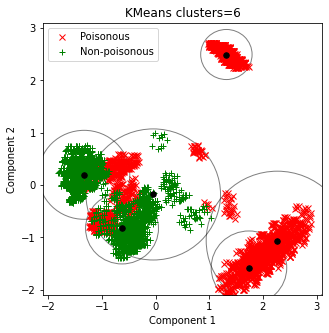

In [8]:
def Q3():
    
    ### STUDENT START ###
    np.random.seed(0)
    
    # we are reducing the dmentions to 2 using PCA
    model = PCA(n_components=2)
    results = model.fit_transform(train_data)
    
    clusters = 6
    plt.figure(figsize = (5,5))
    
    # plotting the poisonous and nonpoisonous in two dimensions with color red and green resp.
    plt.plot(results[train_labels==1][:,0], results[train_labels==1][:,1], 'x', c='red')
    plt.plot(results[train_labels==0][:,0], results[train_labels==0][:,1], '+', c='green')
    
    # limiting the axes for clarity
    plt.ylim([-2.1, 3.1])
    plt.xlim([-2.1, 3.1])

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title("KMeans clusters=%d" % clusters)
    plt.legend(["Poisonous", "Non-poisonous"]) 

    # clustering the train data (dimension reduced train data)    
    kmodel = KMeans(n_clusters=clusters).fit(results)
    
    # extracted the centers
    kcenters = kmodel.cluster_centers_
    kpredictions = kmodel.predict(results)
    plt.scatter(kcenters[:, 0], kcenters[:, 1], c='black', s=30, zorder=3)
    ax = plt.gca()
    
    # for each cluster calculate the radii
    for ix in range(clusters):
        # Calculating radius
        radii = max([np.linalg.norm(np.subtract(i,kcenters[ix])) for i in zip(results[kpredictions == ix, 0],results[kpredictions == ix, 1])])
        # adding the circle to the plot
        ax.add_patch(plt.Circle(kcenters[ix],radii,fill=False,alpha=0.5))
    ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

<span style="font-family:Verdana; color: green;">ANSWER: <br> We created a PCA model with two components and transformed the data into two features. Then we picked the positive examples and did a gmm as follows:</span>

<div style="font-family:Verdana; color: green;">
    <ol>
        <li> Fit Gaussian mixture models for the positive examples from the 2d projected data. We varied the number of mixture components from 1 to 4 and the covariance matrix type to be one of {'spherical', 'diag', 'tied', 'full'}.
             <ol type="a">
                <li>We have displayed a 4x4 grid of square-shaped plots of the estimated density contours.</li>
                <li>Each row showing a different number of mixture components.</li>
                <li>Each column showing a different convariance matrix type.</li>
            </ol>
        </li>
        <li> We have added a title for each plot in the grid</li>
        <li> From the scikit documentation, a "tied" covariance type means that for given set of components all contours will have the same shape and for different set of components the shape can be different. In contrast, a covariance type of "full" means that the contours independently adopt any position and shape even for a given set of components. As shown in column 3 of the plots below, we have showed the 'tied' covariance type. In those plots we notice that for components = 2  the shape of the contours look the same but we see different shapes between components = 2 and components = 3. For covariance type "full", we see different shaped contours even with in a given component size (e.g. components = 2).</li>
    </ol>
</div>

<ipython-input-9-8163eca2baf1>:31: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax[component, j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-9-8163eca2baf1>:31: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax[component, j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-9-8163eca2baf1>:31: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax[component, j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-9-8163eca2baf1>:31: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax[component, j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-9-8163eca2baf1>:31: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax[component, j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 

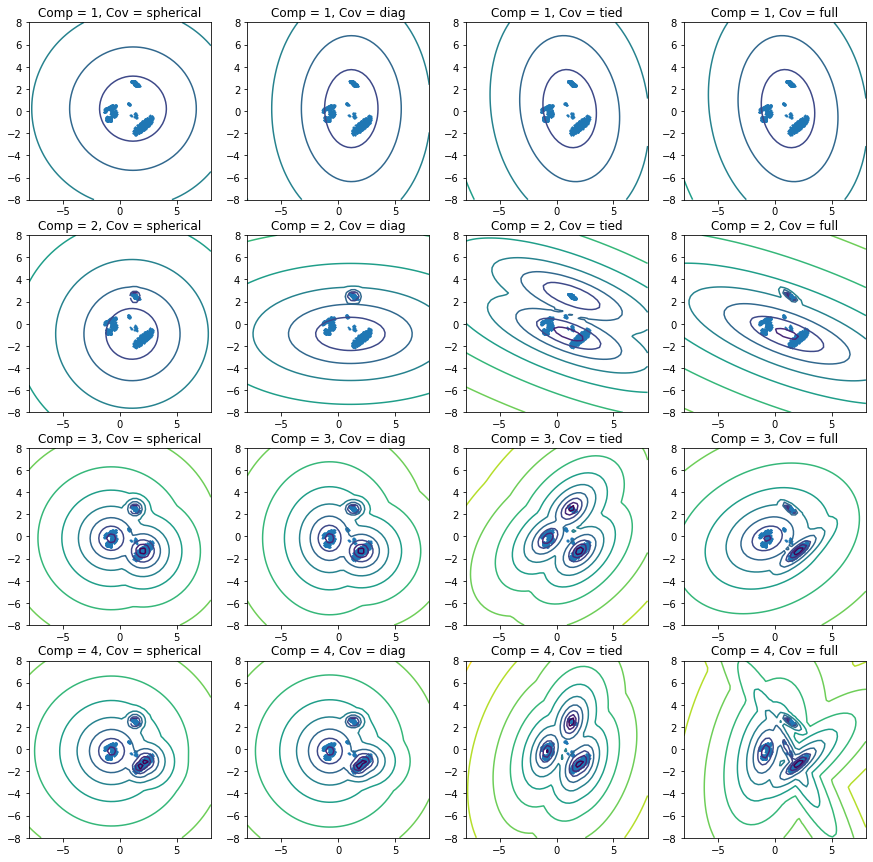

In [9]:
def Q4():
    ### STUDENT START ###
    np.random.seed(0)
    
    # we are reducing the dmentions to 2 using PCA
    model = PCA(n_components=2)
    results = model.fit_transform(train_data)
    
    # selecting only the positives
    positives = results[train_labels == 1]
    covar_types = ['spherical', 'diag', 'tied', 'full']
    
    fig, ax = plt.subplots(4, 4, figsize=(15, 15))
    
    # varying the components 
    for component in range(4):
        # varying the types
        for j, covar_type in enumerate(covar_types):
            # fitting the GMM for the given components and type
            gmm = GaussianMixture(n_components=component+1, covariance_type=covar_type).fit(positives)
            
            # create a uniform grid and calculate the scores at each sample point
            x = np.linspace(-8.0, 8.0)
            y = np.linspace(-8.0, 8.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            # plot the contours 
            CS = ax[component, j].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            ax[component, j].scatter(positives[:, 0], positives[:, 1], .8)
            ax[component, j].set_title("Comp = {}, Cov = {}".format(component+1, covar_type))
            
  ### STUDENT END ###

Q4()

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

<span style="font-family:Verdana; color: green;">ANSWER: <br> We created a PCA model with two components and transformed the train and test data.</span>

<div style="font-family:Verdana; color: green;">
    <ol>
        <li> Fit Gaussian mixture models for the positive examples from the 2d projected data. We the mixture components of 4 and the covariance matrix type of 'full'.
             <ol type="a">
                <li>We created two models gmm_poison, and gmm_nonpoison.</li>
                <li>For each example in the test set we measured how likely it is to have been "generated" by gmm_poison and gmm_nonpoison and predicted the more likely label. We have used score_samples to get the logprobability.We did this without using a for loop as it will be efficient.</li>
            </ol>
        </li>
        <li> We have shown the accuracy of the predictions (95.02%) on the test data.</li>
    </ol>
</div>

In [10]:
def Q5():
    ### STUDENT START ###
    np.random.seed(0)
    
    # reduce the dimensions to two
    model = PCA(n_components=2)
    train_results = model.fit_transform(train_data)
    test_results = model.transform(test_data)
    
    # extract positives and negatives
    train_positives = train_results[train_labels == 1]
    train_negatives = train_results[train_labels == 0]
    
    # fit poison and nonpoison models
    gmm_poison = GaussianMixture(n_components=4, covariance_type="full").fit(train_positives)
    gmm_nonpoison = GaussianMixture(n_components=4, covariance_type="full").fit(train_negatives)
    
    # compute correct positives and correct negatives
    correct_positives = np.sum(gmm_poison.score_samples(test_results[test_labels == 1])>
                               gmm_nonpoison.score_samples(test_results[test_labels == 1]))
    correct_negatives = np.sum(gmm_poison.score_samples(test_results[test_labels == 0])<
                               gmm_nonpoison.score_samples(test_results[test_labels == 0]))
    
    # finally computing the accuracies
    print('Accuracy of positives {}'.format(correct_positives/ len(test_labels[test_labels == 1])))
    print('Accuracy of negatives {}'.format(correct_negatives/ len(test_labels[test_labels == 0])))
    print('Total Accuracy {}'.format((correct_positives+correct_negatives)/ len(test_labels)))
    ### STUDENT END ###

Q5()

Accuracy of positives 0.9345403899721448
Accuracy of negatives 0.9778325123152709
Total Accuracy 0.9501779359430605


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

<span style="font-family:Verdana; color: green;">ANSWER: <br> In this section we run experiments to find GMM that results in best accuracy with number of params no more than 50. We vary the PCA components and GMM components and the covariance types {'spherical', 'diag', 'tied', 'full'}.</span>

<div style="font-family:Verdana; color: green;">
    <ol>
        <li> We varied the PCA components between (1 and 12), GMM components between (1 and 50), covariance types from {'spherical', 'diag', 'tied', 'full'}. As we vary these we calculated the number of parameters. The formula for the number of components were provided the excel sheet provided. when the number of parameters exceed 50 we skip to the next step in the loop.  For the given number of PCA component, GMM component, and Covariance type we created a GMM using the train positive data (i.e. poisonous samples) and the train negative data (i.e. non-poisonous samples) and evaluated with the test positive and test negative data as shown in the snippet below. </li>
        <li> As we go through the loops as outlined above, we measued the accuracy (as described above and shown in the snippet below) and record the accuracy against the PCA component, GMM component, and type. Though normally we refrain from using global variables here we have used to avoid passing these variables in and out of the functions and clutter the code. So, we have introduced 5 global variables to record pca components, gmm components, types, and parameter count. So after the execution of Q6() below, these global variables will be populated. We use these global variables in the plot functions namely plotAccuracies(), and plot3d().</li>
        <li>The plotAccuracies() function plots the accuracies against paramcount.</li>
        <li>The plot3d() function plots accuracy, number of parameters, the covariance type and the number of PCA components. </li>
    </ol>
</div>

In [11]:
pca_comps = []
gmm_comps = []
covar_types = []
param_count = []
accuracies = []

def Q6():
    ### STUDENT START ###
    np.random.seed(0)
    best_combination = ()
    best_accuracy = 0.
    
    # varying PCA components
    for pca_component in range(1, 12):
        model = PCA(n_components=pca_component)
        train_results = model.fit_transform(train_data)
        test_results = model.transform(test_data)
        
        train_positives = train_results[train_labels == 1]
        train_negatives = train_results[train_labels == 0]
        
        test_positives = test_results[test_labels == 1]
        test_negatives = test_results[test_labels == 0]
        
        covar_map = {'spherical': 0, 'diag': 1, 'tied':2, 'full':3}
        
        # varying GMM components
        for gmm_component in range(1, 50):
            for covar_type in ['spherical', 'diag', 'tied', 'full']:
                parameters_count = 0
                
                # computing the parameters for each covar type as defined in the excel
                if covar_type == 'spherical':
                    parameters_count = ((gmm_component-1) + pca_component * gmm_component + gmm_component) * 2
                elif covar_type == 'diag':
                    parameters_count = ((gmm_component-1) + pca_component * gmm_component + pca_component * gmm_component) * 2
                elif covar_type == 'tied':
                    parameters_count = ((gmm_component-1) + pca_component * gmm_component + pca_component * (pca_component + 1) / 2) * 2
                elif covar_type == 'full':
                    parameters_count = ((gmm_component-1) + pca_component * gmm_component + pca_component * (pca_component + 1) / 2 * gmm_component) * 2
                
                # skip the loop when the count is more than 50
                if parameters_count > 50:
                    continue
                
                # generate GMM model for positives and negatives
                gmm_positives = GaussianMixture(n_components=gmm_component, covariance_type=covar_type, random_state=12345).fit(train_positives)
                gmm_negatives = GaussianMixture(n_components=gmm_component, covariance_type=covar_type, random_state=12345).fit(train_negatives)
                
                # compute the correct positives and negatives
                correct_positives = np.sum(gmm_positives.score_samples(test_positives)>gmm_negatives.score_samples(test_positives))
                correct_negatives = np.sum(gmm_positives.score_samples(test_negatives)<gmm_negatives.score_samples(test_negatives))
                correct_predictions = correct_positives + correct_negatives
                
                # update the best_accuracy 
                if best_accuracy < correct_predictions / len(test_labels):
                    best_combination = (pca_component, gmm_component, covar_type, parameters_count, correct_predictions / len(test_labels))
                    best_accuracy = correct_predictions / len(test_labels)
                    
                # record the components, types, counts and accuracies
                pca_comps.append(pca_component)
                gmm_comps.append(gmm_component)
                covar_types.append(covar_map[covar_type])
                param_count.append(parameters_count)
                accuracies.append(correct_predictions / len(test_labels))
                
                # print the components, types, counts and accuracies
                print ("Processed: PCA = %d, GMM = (%d,%s), Parameters = %d, Accuracy = %f" % (pca_component, gmm_component, covar_type, parameters_count, correct_predictions / len(test_labels)))
                
    # finally print the best components, types, counts and accuracies
    print ("\nBest result: PCA = %d, GMM = (%d,%s), Parameters = %d, Accuracy = %f" % best_combination)
  ### STUDENT END ###

Q6()

Processed: PCA = 1, GMM = (1,spherical), Parameters = 4, Accuracy = 0.844306
Processed: PCA = 1, GMM = (1,diag), Parameters = 4, Accuracy = 0.844306
Processed: PCA = 1, GMM = (1,tied), Parameters = 4, Accuracy = 0.844306
Processed: PCA = 1, GMM = (1,full), Parameters = 4, Accuracy = 0.844306
Processed: PCA = 1, GMM = (2,spherical), Parameters = 10, Accuracy = 0.898577
Processed: PCA = 1, GMM = (2,diag), Parameters = 10, Accuracy = 0.898577
Processed: PCA = 1, GMM = (2,tied), Parameters = 8, Accuracy = 0.883452
Processed: PCA = 1, GMM = (2,full), Parameters = 10, Accuracy = 0.898577
Processed: PCA = 1, GMM = (3,spherical), Parameters = 16, Accuracy = 0.907473
Processed: PCA = 1, GMM = (3,diag), Parameters = 16, Accuracy = 0.907473
Processed: PCA = 1, GMM = (3,tied), Parameters = 12, Accuracy = 0.915480
Processed: PCA = 1, GMM = (3,full), Parameters = 16, Accuracy = 0.907473
Processed: PCA = 1, GMM = (4,spherical), Parameters = 22, Accuracy = 0.914591
Processed: PCA = 1, GMM = (4,diag), 

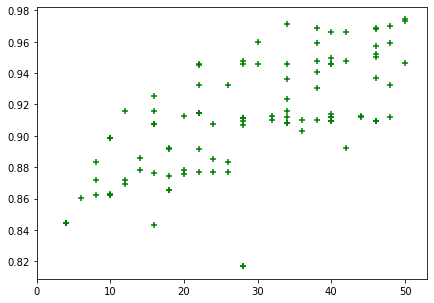

In [12]:
# plot the accuracies vs count
def plotAccuracies(param_count, accuracies):
    plt.figure(figsize=(7, 5))
    plt.xlim([0, 53])
    plt.scatter(np.array(param_count), np.array(accuracies), marker='+', c='green')

# plot the comps, types and accuracies in 3D
def plot3d(param_count, pca_comps, covar_types, accuracies):
    x = np.array(pca_comps)
    y = np.array(param_count)
    c = np.array(covar_types)
    z = np.array(accuracies)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[c == 0], y[c == 0], z[c==0], label='spherical')
    ax.scatter(x[c == 1], y[c == 1], z[c==1], label='diag')
    ax.scatter(x[c == 2], y[c == 2], z[c==2], label='tied')
    ax.scatter(x[c == 3], y[c == 3], z[c==3], label='full')
    ax.set_xlabel("pca components")
    ax.set_ylabel("# of parameters")
    ax.set_zlabel("accuracies")
    ax.legend(loc='upper left')

plotAccuracies(param_count, accuracies)

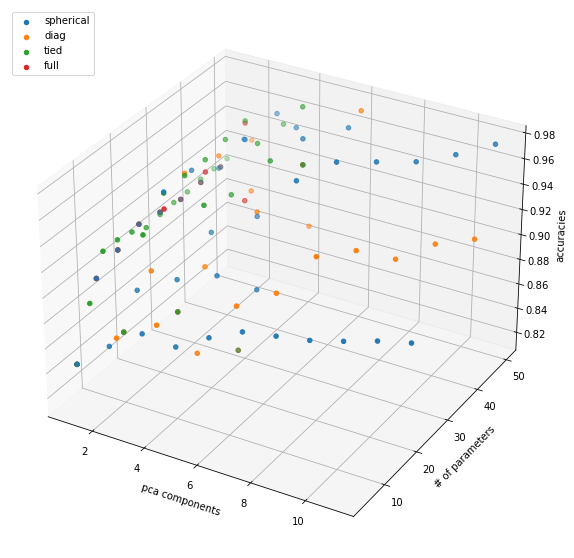

In [13]:
plot3d(param_count, pca_comps, covar_types, accuracies)